In [1]:
!nvidia-smi

Mon Jun 14 06:57:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 套件

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

# pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

from sklearn.linear_model import LinearRegression

# random seed
myseed = 615

# accelerate
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(myseed)

from tqdm.notebook import tqdm

In [3]:
def get_device():
    return 'cuda' if torch.cuda.is_available() else 'cpu'

## 讀檔

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
"""
def ConcatData(Input, path):
    for year in range(2000, 2020+1, 1):
        for month in range(1, 12+1, 1):
            if month < 10:
                tmp = pd.read_csv(path + f"{year}-0{month}.csv", skiprows=[0, 1])
            else:
                tmp = pd.read_csv(path + f"{year}-{month}.csv", skiprows=[0, 1])
            Input = pd.concat([Input, tmp], ignore_index=True)
    return Input

# path
root = "/content/drive/MyDrive/統計專題/data/"
path_Taipei = root + "Taipei/"
path_Taichung = root + "Taichung/"
path_Kaohsiung = root + "Kaohsiung/"
path_Yilan = root + "Yilan/"

# Init
data_Taipei = data_Taichung = data_Kaohsiung = data_Yilan = pd.DataFrame()

# Concatenate Data
data_Taipei = ConcatData(data_Taipei, path_Taipei)
data_Taichung = ConcatData(data_Taichung, path_Taichung)
data_Kaohsiung = ConcatData(data_Kaohsiung, path_Kaohsiung)
data_Yilan = ConcatData(data_Yilan, path_Yilan)

# output file
data_Taipei.to_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Taipei.csv", index=False)
data_Taichung.to_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Taichung.csv", index=False)
data_Kaohsiung.to_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Kaohsiung.csv", index=False)
data_Yilan.to_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Yilan.csv", index=False)
"""

'\ndef ConcatData(Input, path):\n    for year in range(2000, 2020+1, 1):\n        for month in range(1, 12+1, 1):\n            if month < 10:\n                tmp = pd.read_csv(path + f"{year}-0{month}.csv", skiprows=[0, 1])\n            else:\n                tmp = pd.read_csv(path + f"{year}-{month}.csv", skiprows=[0, 1])\n            Input = pd.concat([Input, tmp], ignore_index=True)\n    return Input\n\n# path\nroot = "/content/drive/MyDrive/統計專題/data/"\npath_Taipei = root + "Taipei/"\npath_Taichung = root + "Taichung/"\npath_Kaohsiung = root + "Kaohsiung/"\npath_Yilan = root + "Yilan/"\n\n# Init\ndata_Taipei = data_Taichung = data_Kaohsiung = data_Yilan = pd.DataFrame()\n\n# Concatenate Data\ndata_Taipei = ConcatData(data_Taipei, path_Taipei)\ndata_Taichung = ConcatData(data_Taichung, path_Taichung)\ndata_Kaohsiung = ConcatData(data_Kaohsiung, path_Kaohsiung)\ndata_Yilan = ConcatData(data_Yilan, path_Yilan)\n\n# output file\ndata_Taipei.to_csv("/content/drive/MyDrive/統計專題/data/Con

In [6]:
# 讀Concat檔
data_Taipei = pd.read_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Taipei.csv")
data_Taichung = pd.read_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Taichung.csv")
data_Kaohsiung = pd.read_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Kaohsiung.csv")
data_Yilan = pd.read_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Yilan.csv")

In [7]:
data_Taipei

,ObsTime,StnPres,SeaPres,StnPresMax,StnPresMaxTime,StnPresMin,StnPresMinTime,Temperature,T Max,T Max Time,T Min,T Min Time,Td dew point,RH,RHMin,RHMinTime,WS,WD,WSGust,WDGust,WGustTime,Precp,PrecpHour,PrecpMax10,PrecpMax10Time,PrecpMax60,PrecpMax60Time,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,UVI Max,UVI Max Time,Cloud Amount
0,1,1005.9,1016.0,1008.3,2000-01-01 08:11,1003.2,2000-01-01 15:28,20.3,26.2,2000-01-01 12:51,15.8,2000-01-01 23:48,13.8,69,35,2000-01-01 14:16,1.4,350,7.4,10,2000-01-01 14:34,0.0,0.0,0.0,...,0.0,...,8.9,83.7,10.28,10.5,2.6,X,2000-01-01 10:00,2.9
1,2,1005.2,1015.3,1007.2,2000-01-02 08:40,1002.1,2000-01-02 15:11,19.1,26.9,2000-01-02 12:51,12.9,2000-01-02 06:35,9.8,60,26,2000-01-02 13:09,1.4,10,8.1,90,2000-01-02 14:40,0.0,0.0,0.0,...,0.0,...,9.8,92.2,10.24,10.3,2.7,X,2000-01-02 10:00,0.0
2,3,1006.2,1016.3,1007.7,2000-01-03 09:40,1004.9,2000-01-03 14:49,18.9,24.7,2000-01-03 12:31,14.8,2000-01-03 06:59,12.6,68,43,2000-01-03 11:01,0.9,230,6.2,270,2000-01-03 12:39,0.0,0.0,0.0,...,0.0,...,9.0,84.6,8.26,9.4,1.8,X,2000-01-03 10:00,3.5
3,4,1006.2,1016.3,1008.1,2000-01-04 09:16,1004.0,2000-01-04 15:29,17.8,24.0,2000-01-04 14:56,13.6,2000-01-04 05:52,14.2,81,51,2000-01-04 12:37,0.8,90,4.5,270,2000-01-04 14:08,0.0,0.0,0.0,...,0.0,...,7.6,71.4,7.81,4.4,1.1,4,2000-01-04 13:00,2.4
4,5,1004.3,1014.4,1006.4,2000-01-05 00:02,1002.3,2000-01-05 15:58,19.7,27.0,2000-01-05 12:34,15.0,2000-01-05 06:51,13.5,70,37,2000-01-05 12:38,0.9,340,5.5,60,2000-01-05 15:04,0.0,0.0,0.0,...,0.0,...,7.0,65.7,8.41,6.5,1.6,4,2000-01-05 13:00,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,27,1013.2,1016.8,1014.8,2020-12-27 23:57,1011.1,2020-12-27 15:02,19.7,24.5,2020-12-27 10:33,17.4,2020-12-27 00:03,16.6,83,49,2020-12-27 10:37,1.5,190,7.1,120,2020-12-27 16:57,1.0,2.1,0.5,2020-12-27 11:41,0.5,2020-12-27 10:51,2.1,19.9,6.98,30.8,-3.0,3,2020-12-27 11:00,8.5
7667,28,1012.4,1016.0,1015.2,2020-12-28 08:04,1009.3,2020-12-28 23:50,20.2,21.8,2020-12-28 14:00,17.8,2020-12-28 00:37,16.9,82,65,2020-12-28 13:54,4.1,80,15.0,100,2020-12-28 13:50,3.0,0.5,1.0,2020-12-28 02:17,1.5,2020-12-28 01:36,0.1,0.9,7.19,24.3,1.9,3,2020-12-28 11:00,8.5
7668,29,1010.2,1013.8,1012.9,2020-12-29 23:58,1008.3,2020-12-29 14:22,21.6,26.4,2020-12-29 11:38,19.0,2020-12-29 06:26,17.6,79,49,2020-12-29 11:43,1.2,310,7.3,90,2020-12-29 00:19,0.0,0.0,0.0,...,0.0,...,2.0,19.0,9.55,21.8,-2.3,4,2020-12-29 12:00,7.8
7669,30,1022.3,1026.0,1026.0,2020-12-30 23:30,1012.8,2020-12-30 00:02,12.7,20.5,2020-12-30 00:24,10.3,2020-12-30 22:48,7.4,70,57,2020-12-30 23:31,3.0,90,13.3,30,2020-12-30 00:33,4.0,1.9,1.5,2020-12-30 00:23,4.0,2020-12-30 00:01,0.0,0.0,0.55,13.8,-1.7,1,2020-12-30 15:00,10.0


## Preprocessing

#### 相關係數

In [8]:
def is_number(str):
    try:
        # 因為使用float有一個例外是'NaN'
        if str=='NaN':
              return False
        float(str)
        return True
    except ValueError:
        return False


def is_number2(str):
    try:
      # 因為使用float有一個例外是'NaN'
        if str=='NaN':
            return False
        int(str)
        return True
    except ValueError:
        return False


def toType(df):
    afterDf = pd.DataFrame()

    lenA = len(df)
    inter = ['ObsTime', 'RH', 'RHMin', 'WD', 'WDGust', 'UVI Max']
    fl = ['StnPres', 'SeaPres', 'StnPresMax', 'StnPresMin', 'Temperature', 'T Max', 'T Min', 'Td dew point', 'WS', 'WSGust', 'Precp', 'PrecpHour', 'PrecpMax10', 'PrecpMax60', 'SunShine', 'SunShineRate', 'GloblRad', 'VisbMean', 'EvapA', 'Cloud Amount']
    time = ['StnPresMaxTime', 'StnPresMinTime', 'T Max Time', 'T Min Time', 'RHMinTime', 'WGustTime', 'PrecpMax10Time', 'PrecpMax60Time', 'UVI Max Time']
    for i in inter:
        afterDf[i] = df[i]
        for j in range(lenA): 
            if is_number2(df[i][j]):
                afterDf[i][j] = int(df[i][j])
            else:
                afterDf[i][j] = 0

    for i in fl:
        afterDf[i] = df[i]
        for j in range(lenA):
            if is_number(df[i][j]):
                afterDf[i][j] = float(df[i][j])
            else:
                afterDf[i][j] = 0
    for i in fl:
        afterDf[i] = pd.to_numeric(afterDf[i], errors='coerce')
    for i in inter:
        afterDf[i] = pd.to_numeric(afterDf[i], errors='coerce')

    return afterDf

In [9]:
print(len(data_Taipei))

7671


In [10]:
# preprocess the int, float data
test = toType(data_Taipei)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to b

In [11]:
mask = test["Precp"] > 0
# test["PrecpHour"] > 0
outOfPrecp = test[mask]

In [12]:
test

,ObsTime,RH,RHMin,WD,WDGust,UVI Max,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,WS,WSGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,Cloud Amount
0,1,69,35,350,10,0,1005.9,1016.0,1008.3,1003.2,20.3,26.2,15.8,13.8,1.4,7.4,0.0,0.0,0.0,0.0,8.9,83.7,10.28,10.5,2.6,2.9
1,2,60,26,10,90,0,1005.2,1015.3,1007.2,1002.1,19.1,26.9,12.9,9.8,1.4,8.1,0.0,0.0,0.0,0.0,9.8,92.2,10.24,10.3,2.7,0.0
2,3,68,43,230,270,0,1006.2,1016.3,1007.7,1004.9,18.9,24.7,14.8,12.6,0.9,6.2,0.0,0.0,0.0,0.0,9.0,84.6,8.26,9.4,1.8,3.5
3,4,81,51,90,270,4,1006.2,1016.3,1008.1,1004.0,17.8,24.0,13.6,14.2,0.8,4.5,0.0,0.0,0.0,0.0,7.6,71.4,7.81,4.4,1.1,2.4
4,5,70,37,340,60,4,1004.3,1014.4,1006.4,1002.3,19.7,27.0,15.0,13.5,0.9,5.5,0.0,0.0,0.0,0.0,7.0,65.7,8.41,6.5,1.6,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,27,83,49,190,120,3,1013.2,1016.8,1014.8,1011.1,19.7,24.5,17.4,16.6,1.5,7.1,1.0,2.1,0.5,0.5,2.1,19.9,6.98,30.8,-3.0,8.5
7667,28,82,65,80,100,3,1012.4,1016.0,1015.2,1009.3,20.2,21.8,17.8,16.9,4.1,15.0,3.0,0.5,1.0,1.5,0.1,0.9,7.19,24.3,1.9,8.5
7668,29,79,49,310,90,4,1010.2,1013.8,1012.9,1008.3,21.6,26.4,19.0,17.6,1.2,7.3,0.0,0.0,0.0,0.0,2.0,19.0,9.55,21.8,-2.3,7.8
7669,30,70,57,90,30,1,1022.3,1026.0,1026.0,1012.8,12.7,20.5,10.3,7.4,3.0,13.3,4.0,1.9,1.5,4.0,0.0,0.0,0.55,13.8,-1.7,10.0


In [13]:
# corr map
test.corr()

,ObsTime,RH,RHMin,WD,WDGust,UVI Max,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,WS,WSGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,Cloud Amount
ObsTime,1.000000,-0.010998,-0.000632,-0.004615,-0.006734,0.011808,0.011104,0.012242,0.010762,0.009738,0.007508,0.005743,0.008913,0.003129,-0.001625,0.001443,0.001557,-0.003961,0.011830,0.010117,0.007235,0.005080,0.014756,0.014958,-0.001177,0.003474
RH,-0.010998,1.000000,0.836174,-0.011671,-0.040704,-0.460132,0.013548,0.015567,0.034231,-0.002993,-0.266610,-0.334293,-0.166927,0.131019,-0.080901,-0.053667,0.364282,0.646957,0.320202,0.304361,-0.599947,-0.594505,-0.623538,-0.423908,-0.421893,0.608135
RHMin,-0.000632,0.836174,1.000000,-0.156609,-0.150449,-0.568107,0.153823,0.136366,0.170552,0.138362,-0.356828,-0.483327,-0.225251,-0.022872,0.124644,0.063711,0.287878,0.626150,0.178045,0.177277,-0.670528,-0.662675,-0.692258,-0.465628,-0.354466,0.638582
WD,-0.004615,-0.011671,-0.156609,1.000000,0.496932,0.170985,-0.341438,-0.312148,-0.342677,-0.333992,0.253353,0.293512,0.201350,0.250122,-0.471929,-0.302469,0.023264,-0.078193,0.053426,0.044780,0.133175,0.108327,0.148391,-0.044418,0.061967,-0.071966
WDGust,-0.006734,-0.040704,-0.150449,0.496932,1.000000,0.185013,-0.272868,-0.290621,-0.274411,-0.266050,0.281029,0.312236,0.238278,0.268806,-0.398303,-0.248859,0.024257,-0.084150,0.073200,0.058878,0.108319,0.084301,0.169158,-0.009094,0.036716,-0.056003
UVI Max,0.011808,-0.460132,-0.568107,0.170985,0.185013,1.000000,-0.536588,-0.537763,-0.559863,-0.503388,0.721591,0.778215,0.642272,0.550205,-0.053703,0.019849,-0.157138,-0.488611,-0.016076,-0.039972,0.695480,0.642288,0.848185,0.464343,0.273988,-0.560803
StnPres,0.011104,0.013548,0.153823,-0.341438,-0.272868,-0.536588,1.000000,0.962695,0.991100,0.988539,-0.797633,-0.763854,-0.785840,-0.811297,0.280038,0.059672,-0.234926,0.046769,-0.279490,-0.254414,-0.211308,-0.147911,-0.379471,-0.210781,-0.020960,0.126041
SeaPres,0.012242,0.015567,0.136366,-0.312148,-0.290621,-0.537763,0.962695,1.000000,0.953316,0.951981,-0.830424,-0.790295,-0.821960,-0.845132,0.250306,0.017257,-0.246717,0.037579,-0.287235,-0.263552,-0.215666,-0.150514,-0.385836,-0.144896,0.008834,0.119923
StnPresMax,0.010762,0.034231,0.170552,-0.342677,-0.274411,-0.559863,0.991100,0.953316,1.000000,0.964969,-0.818155,-0.781376,-0.810057,-0.824084,0.294483,0.102740,-0.195935,0.081652,-0.260384,-0.233043,-0.231926,-0.166709,-0.405119,-0.225327,-0.038571,0.146105
StnPresMin,0.009738,-0.002993,0.138362,-0.333992,-0.266050,-0.503388,0.988539,0.951981,0.964969,1.000000,-0.761540,-0.732029,-0.746933,-0.780743,0.262332,0.013310,-0.267066,0.011828,-0.290053,-0.269276,-0.191969,-0.131764,-0.349695,-0.194876,-0.009186,0.109445


In [14]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

def draw(df):
    plt.figure(figsize=(30, 30))
    corrMatrix = df.corr()
    sn.heatmap(corrMatrix, annot=True)
    plt.show()


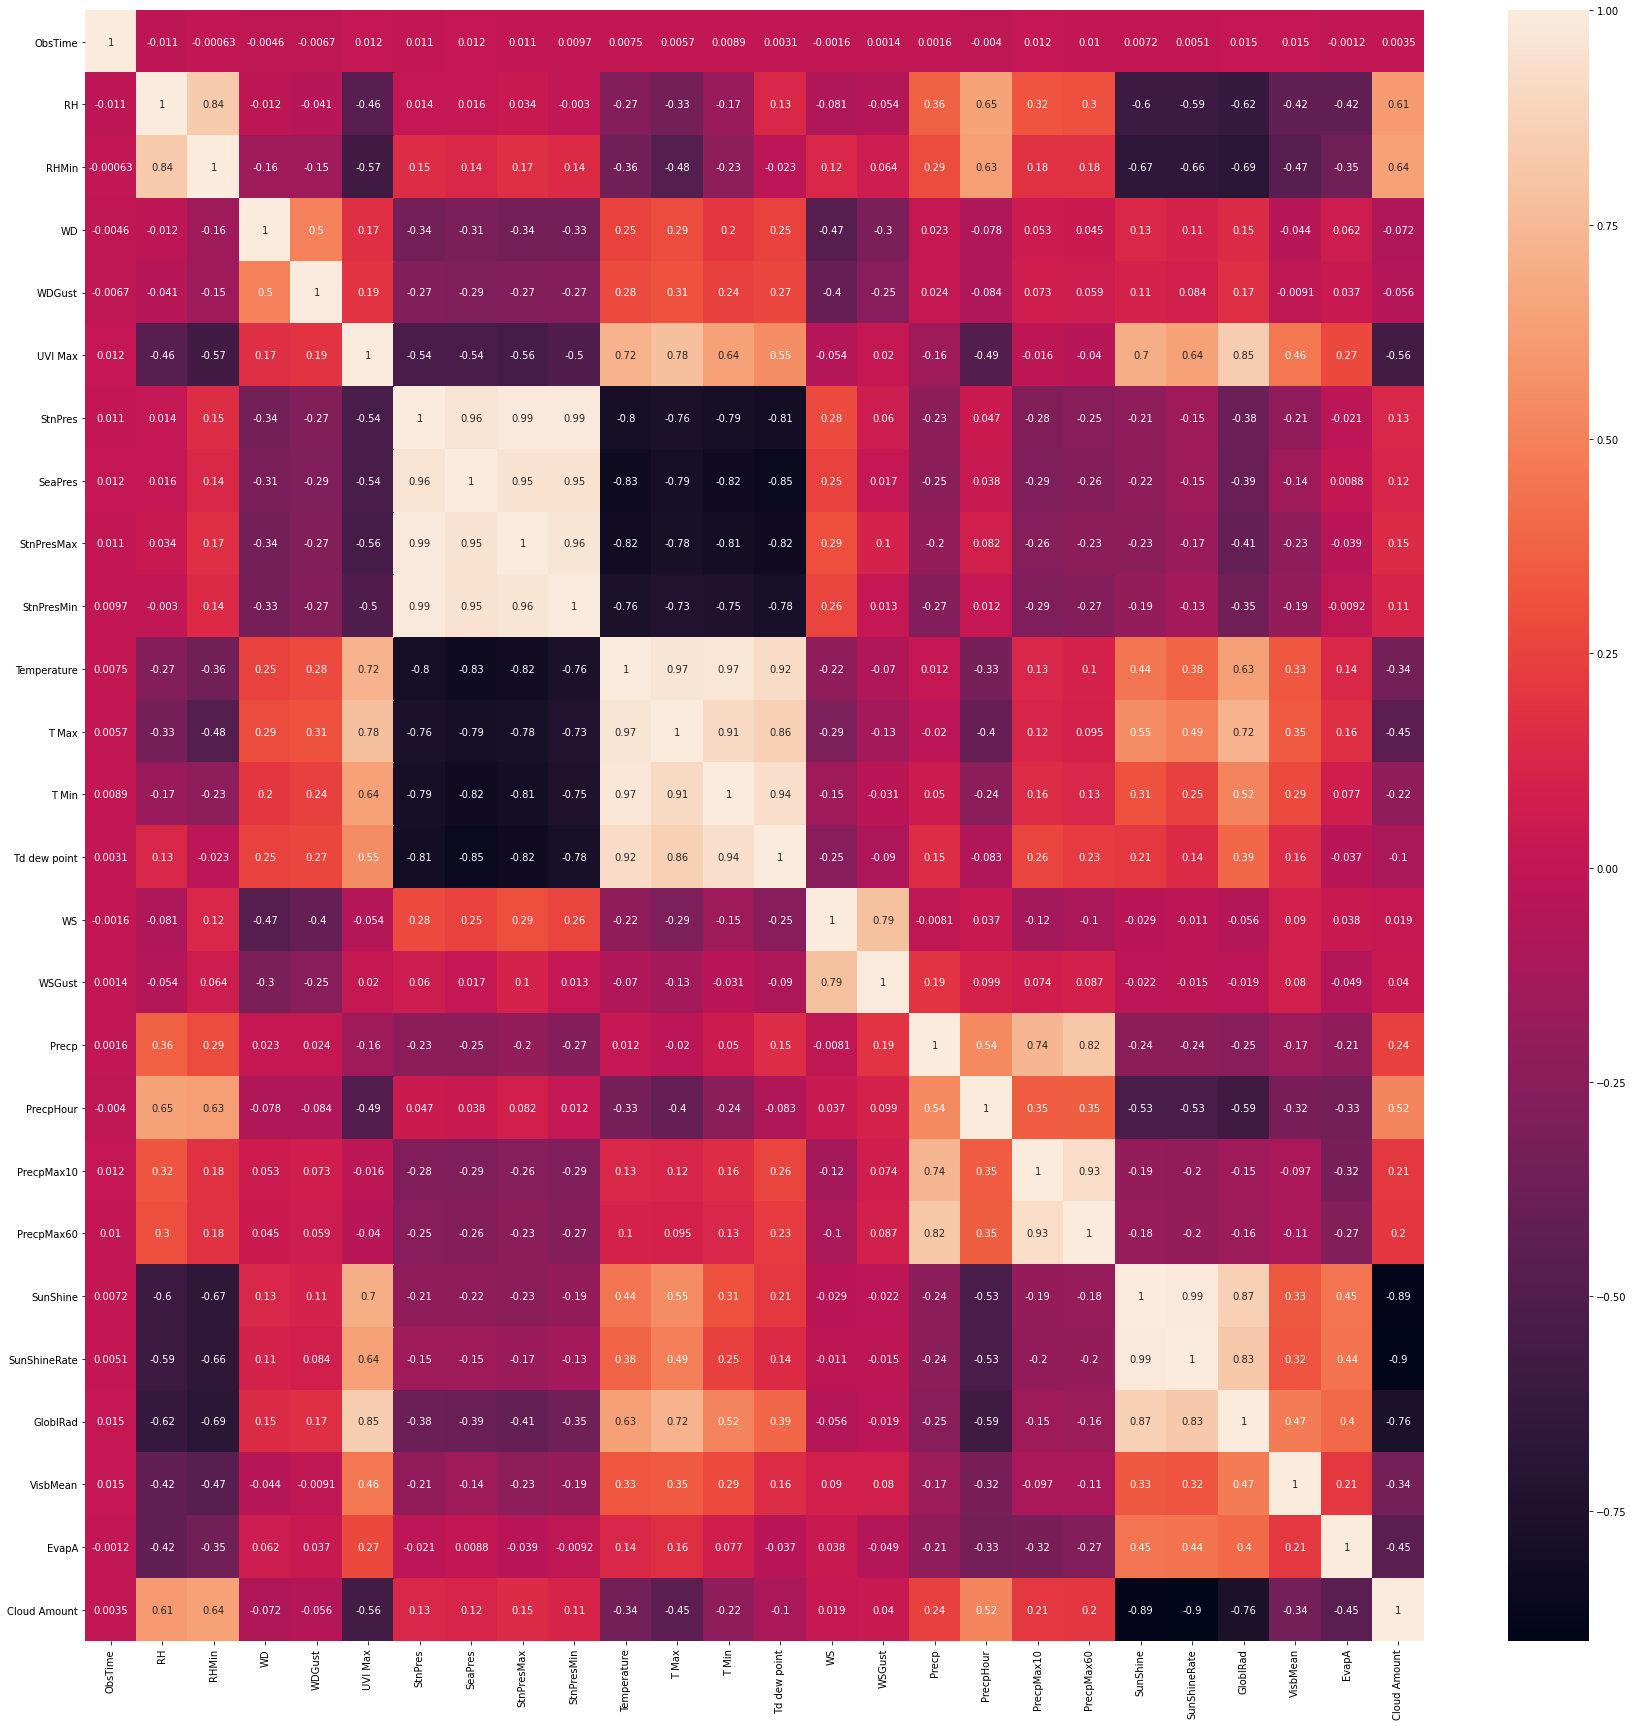

In [15]:
draw(test)

In [16]:
test.corr()['Precp'].sort_values()

StnPresMin     -0.267066
GloblRad       -0.250487
SeaPres        -0.246717
SunShineRate   -0.244754
SunShine       -0.239148
StnPres        -0.234926
EvapA          -0.214462
StnPresMax     -0.195935
VisbMean       -0.166144
UVI Max        -0.157138
T Max          -0.020199
WS             -0.008051
ObsTime         0.001557
Temperature     0.011869
WD              0.023264
WDGust          0.024257
T Min           0.049726
Td dew point    0.154846
WSGust          0.189187
Cloud Amount    0.242465
RHMin           0.287878
RH              0.364282
PrecpHour       0.535302
PrecpMax10      0.735776
PrecpMax60      0.818577
Precp           1.000000
Name: Precp, dtype: float64

#### PCA

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(test)
X_dr = pca.transform(test)

## Dataset

#### Data Split

In [18]:
def SplitData(input):
    # input: DataFrame
    # output: ndarray

    input = np.asarray(input)
    # train 15 years
    train_year = 365*11 + 366*4
    train_set = input[:train_year, :]
    # val 3 years
    val_year = 365*2 + 366
    val_set = input[train_year:train_year+val_year, :]
    # test 3 years
    test_set = input[train_year+val_year:, :]

    return train_set, val_set, test_set


def SplitData2(input):
    # input: DataFrame
    # output: ndarray
    train_len = int(outOfPrecp.shape[0] * 0.6)
    val_len = int(outOfPrecp.shape[0] * 0.2)

    input = np.asarray(input)
    # train 15 years
    # train_year = 365*11 + 366*4
    train_set = input[:train_len, :]
    # val 3 years
    val_year = 365*2 + 366
    val_set = input[train_len:train_len+val_len, :]
    # test 3 years
    test_set = input[train_len+val_len:, :]

    return train_set, val_set, test_set


# train_set, val_set, test_set = SplitData(test)
train_set, val_set, test_set = SplitData2(outOfPrecp)

In [19]:
np.savetxt("/content/drive/MyDrive/統計專題/test_data/train.csv", train_set, delimiter=",")
np.savetxt("/content/drive/MyDrive/統計專題/test_data/val.csv", val_set, delimiter=",")
np.savetxt("/content/drive/MyDrive/統計專題/test_data/test.csv", test_set, delimiter=",")

#### Data Load

In [20]:
class CWBDataset(Dataset):
    def __init__(self, path, sequence_length=30, transforms=None, mode='train'):
        self.mode = mode
        self.seq_len = sequence_length
        self.transforms = transforms


        # Read data into numpy arrays
        with open(path, 'r') as fp:
            data = list(csv.reader(fp))
            data = np.array(data[1:])[:, :].astype("float32")
        
            # feature selection
            # ['ObsTime', 'RH', 'RHMin', 'WD', 'WDGust', 'UVI Max', 'StnPres', 'SeaPres', 'StnPresMax', 
            #  'StnPresMin', 'Temperature', 'T Max', 'T Min', 'Td dew point', 'WS', 'WSGust', 'Precp', 
            #  'PrecpHour', 'PrecpMax10', 'PrecpMax60', 'SunShine', 'SunShineRate', 'GloblRad', 'VisbMean', 'EvapA', 'Cloud Amount']


            # all:
            # feats = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,25]

            feats = [1,2,5,6,7,8,9,13,15,20,21,22,23,24,25]


        if mode in ['train', 'dev', 'test']:
            self.target = data[:, 16]
            self.data = data[:, feats]

        self.dim = self.data.shape[1]

    def __len__(self):
        return self.data.__len__()


    def __getitem__(self, index):
        if self.mode in ['train', 'dev', 'test']:
            if index + self.seq_len > self.__len__():
                if self.transforms is not None:
                    item = torch.zeros(self.seq_len, self.data[0].__len__())
                    target = torch.zeros(self.seq_len, self.data[0].__len__())
                    item[:self.__len__() - index] = self.data[index:]
                    target[:self.__len__() - index] = self.target[index:]
                    return item, target

                else:
                    item = np.zeros([self.seq_len, self.data[0].__len__()], dtype="float32")
                    target = np.zeros(self.seq_len, dtype="float32")
                    item[:self.__len__() - index] = self.data[index:]
                    target[:self.__len__() - index] = self.target[index:]

                    return item, target

            else:
                if self.transforms is not None:
                    return self.transforms(self.data[index:index+self.seq_len]), self.transforms(self.target[index:index+self.seq_len][-1])
                else:
                    return self.data[index:index+self.seq_len], self.target[index:index+self.seq_len]

        else:
            pass

    def __len__(self):
        return len(self.data)

#### DataLoader

In [21]:
def torch_dataloader(path, mode, batch_size, n_jobs=0):
    dataset = CWBDataset(path, mode=mode)  # Construct dataset
    dataloader = DataLoader(dataset, batch_size, shuffle=False, 
                            drop_last=True, num_workers=n_jobs, 
                            pin_memory=True) 
    return dataloader

In [22]:
def torch_dataloader2(path, mode, batch_size, n_jobs=0):
    dataset = CWBDataset(path, mode=mode, sequence_length=180)  # Construct dataset
    dataloader = DataLoader(dataset, batch_size, shuffle=False, 
                            drop_last=True, num_workers=n_jobs, 
                            pin_memory=True) 
    return dataloader

## LSTM

#### Network

In [23]:
import math

class LSTM(nn.Module):
    def __init__(self, input_sz, hidden_sz):
        super().__init__()
        self.input_sz = input_sz
        self.hidden_size = hidden_sz
        self.W = nn.Parameter(torch.Tensor(input_sz, hidden_sz * 4))
        self.U = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz * 4))
        self.bias = nn.Parameter(torch.Tensor(hidden_sz * 4))
        self.init_weights()
                
    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)
         
    def forward(self, x, init_states=None):
        """Assumes x is of shape (batch, sequence, feature)"""
        bs, seq_sz, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(bs, self.hidden_size).to(x.device), 
                        torch.zeros(bs, self.hidden_size).to(x.device))
        else:
            h_t, c_t = init_states
         
        HS = self.hidden_size
        for t in range(seq_sz):
            x_t = x[:, t, :]
            # batch the computations into a single matrix multiplication
            gates = x_t @ self.W + h_t @ self.U + self.bias
            i_t, f_t, g_t, o_t = (
                torch.sigmoid(gates[:, :HS]), # input
                torch.sigmoid(gates[:, HS:HS*2]), # forget
                torch.tanh(gates[:, HS*2:HS*3]),
                torch.sigmoid(gates[:, HS*3:]), # output
            )
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        # reshape from shape (sequence, batch, feature) to (batch, sequence, feature)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, (h_t, c_t)

In [24]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(Net, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # self.lstm = LSTM(32, 32) # nn.LSTM(32, 32, batch_first=True)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

        self.criterion = nn.MSELoss(reduction='mean')
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, (h_n, h_c) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

    def loss_fn(self, pred, target):
        return self.criterion(pred, target)

#### Training

In [25]:
def train(tr_set, dv_set, model, config, device):
    n_epochs = config['n_epochs']

    # return the object attribute
    optimizer = getattr(torch.optim, config['optimizer'])(model.parameters(), **config['optim_hparas'])

    min_mse = 1000.
    loss_record = {'train': [], 'dev': []}
    epoch = 0
    while epoch < n_epochs:
        model.train()
        for i, (x, y) in enumerate(tr_set):
            
            optimizer.zero_grad()
            x, y = x.to(device), y.to(device)
            y = y[:, -1]
            pred = model(x).flatten()

            
            mse_loss = model.loss_fn(pred, y)
            mse_loss.backward()
            optimizer.step()
            # detach: stop back-propagation
            loss_record['train'].append(mse_loss.detach().cpu().item())
        
        dev_mse = dev(dv_set, model, device)
        if dev_mse < min_mse:
            min_mse = dev_mse
            print("Saving model (epoch = {:4d}, loss = {:.4f})".format(epoch+1, min_mse))
            torch.save(model.state_dict(), config['save_path'])
            
        epoch += 1
        loss_record['dev'].append(dev_mse)
    
    return min_mse, loss_record

#### Validation

In [26]:
def dev(dv_set, model, device):
    model.eval()
    total_loss = 0.
    for x, y in dv_set:
        x, y = x.to(device), y.to(device)
        y = y[:, -1]
        with torch.no_grad():
            pred = model(x).flatten()
            mse_loss = model.loss_fn(pred, y)
        total_loss += mse_loss.detach().cpu().item() * len(x)
    total_loss /= len(dv_set.dataset)

    return total_loss

#### Testing

In [27]:
def testFun(tt_set, model, device):
    model.eval()
    preds = []
    total_loss = 0
    for x, y in tt_set:
        x, y = x.to(device),  y.to(device)
        y = y[:, -1]

        with torch.no_grad():
            pred = model(x).flatten()
            preds.append(pred.detach().cpu())
            mse_loss = model.loss_fn(pred, y)
        total_loss += mse_loss.detach().cpu().item() * len(x)
    total_loss /= len(tt_set.dataset)

    preds = torch.cat(preds, dim=0).numpy()
    return preds, total_loss

In [28]:
def testRain(tt_set, model, device):
    model.eval()
    rainyDay = 0
    rightDay = 0
    preds = []
    total_loss = 0
    for x, y in tt_set:
        x = x.to(device)
        y = y.to(device)
        y = y[:, -1]
        x = torch.cuda.FloatTensor(x)
        with torch.no_grad():
            pred = model(x).flatten()
            preds.append(pred.detach().cpu())
            mse_loss = model.loss_fn(pred, y)
            for k in range(len(y)):
              # print(k)

              if y[k] > 30:
                rainyDay += 1
                if pred[k] > 30:
                  rightDay += 1
        total_loss += mse_loss.detach().cpu().item() * len(x)
    total_loss /= len(tt_set.dataset)

    acc = rightDay / rainyDay
    print("Rain:" + str(rainyDay))
    print("RainRight:" + str(rightDay))


    preds = torch.cat(preds, dim=0).numpy()
    return preds, total_loss, acc

In [29]:
def testRainEnsemble(tt_set, models, device, rates):
    allRate = 0
    for re in rates:
        allRate += re  

    for model in models:
        model.eval()
    rainyDay = 0
    rightDay = 0
    preds = []
    total_loss = 0
    for x, y in tt_set:
        x = x.to(device)
        y = y.to(device)
        y = y[:, -1]
        x = torch.cuda.FloatTensor(x)
        with torch.no_grad():
            pred = 0
            r = 0
            
            # pred = models[0](x)
            for model in models:
                pred += model(x).flatten() * rates[r]
                r = r + 1

            pred = pred / allRate
            for k in range(len(y)):
                if y[k] > 30:
                    rainyDay += 1
                    if pred[k] > 30:
                        rightDay += 1
            preds.append(pred.detach().cpu())
            mse_loss = model.loss_fn(pred, y)
        total_loss += mse_loss.detach().cpu().item() * len(x)
    total_loss /= len(tt_set.dataset)
    acc = rightDay / rainyDay
    print("Rain:" + str(rainyDay))
    print("RainRight:" + str(rightDay))

    preds = torch.cat(preds, dim=0).numpy()
    return preds, total_loss, acc

In [30]:
def testRainEnsemble2(tt_set, tt_set2, models, device, rates):
    allRate = 0
    for re in rates:
        allRate += re  

    for model in models:
        model.eval()
    rainyDay = 0
    rightDay = 0
    preds = []
    total_loss = 0
    for x, y in tt_set:
        x = x.to(device)
        y = y.to(device)
        y = y[:, -1]
        x = torch.cuda.FloatTensor(x)
        with torch.no_grad():
            pred = 0
            r = 0
            
            # pred = models[0](x)
            for model in models:
                pred += model(x).flatten() * rates[r]
                r = r + 1

            pred = pred / allRate
            for k in range(len(y)):
                if y[k] > 30:
                    rainyDay += 1
                    if pred[k] > 30:
                        rightDay += 1
            preds.append(pred.detach().cpu())
            mse_loss = model.loss_fn(pred, y)
        total_loss += mse_loss.detach().cpu().item() * len(x)

    for x, y in tt_set2:
        x = x.to(device)
        y = y.to(device)
        y = y[:, -1]
        x = torch.cuda.FloatTensor(x)
        with torch.no_grad():
            pred = 0
            r = 0
            
            # pred = models[0](x)
            for model in models:
                pred += model(x).flatten() * rates[r]
                r = r + 1

            pred = pred / allRate
            for k in range(len(y)):
                if y[k] > 30:
                    rainyDay += 1
                    if pred[k] > 30:
                        rightDay += 1
            preds.append(pred.detach().cpu())
            mse_loss = model.loss_fn(pred, y)
        total_loss += mse_loss.detach().cpu().item() * len(x)
        
    total_loss /= len(tt_set.dataset+tt_set2.dataset)
    acc = rightDay / rainyDay
    print("Rain:" + str(rainyDay))
    print("RainRight:" + str(rightDay))

    preds = torch.cat(preds, dim=0).numpy()
    return preds, total_loss, acc

#### Hyperparameters

In [31]:
device = get_device()
config = {
            'n_epochs': 6000,
            'batch_size': 64,
            'optimizer': 'AdamW',
            'optim_hparas': {
                'lr': 1e-4,
            },
            'save_path': '/content/drive/MyDrive/統計專題/model/LSTM/Taipei_RainOnlyFeature/model2.ckpt'
            
}

## Main 

#### Load data/model

In [32]:
tr_set = torch_dataloader("/content/drive/MyDrive/統計專題/test_data/train.csv", 'train', config['batch_size'])
dv_set = torch_dataloader("/content/drive/MyDrive/統計專題/test_data/val.csv", 'dev', config['batch_size'])
tt_set = torch_dataloader("/content/drive/MyDrive/統計專題/test_data/test.csv", 'test', config['batch_size'])

tr_set2 = torch_dataloader2("/content/drive/MyDrive/統計專題/test_data/train.csv", 'train', config['batch_size'])
dv_set2 = torch_dataloader2("/content/drive/MyDrive/統計專題/test_data/val.csv", 'dev', config['batch_size'])
tt_set2 = torch_dataloader2("/content/drive/MyDrive/統計專題/test_data/test.csv", 'test', config['batch_size'])

In [33]:
model = Net(input_size=tr_set.dataset.dim, hidden_size=64, num_layers=1).to(device)

#### Train

In [34]:
model_loss, model_loss_record = train(tr_set, dv_set, model, config, device)

串流輸出內容已截斷至最後 5000 行。
Saving model (epoch =  836, loss = 704.0781)
Saving model (epoch =  837, loss = 704.0437)
Saving model (epoch =  838, loss = 704.0097)
Saving model (epoch =  839, loss = 703.9759)
Saving model (epoch =  840, loss = 703.9425)
Saving model (epoch =  841, loss = 703.9097)
Saving model (epoch =  842, loss = 703.8776)
Saving model (epoch =  843, loss = 703.8462)
Saving model (epoch =  844, loss = 703.8155)
Saving model (epoch =  845, loss = 703.7829)
Saving model (epoch =  846, loss = 703.7206)
Saving model (epoch =  847, loss = 703.6129)
Saving model (epoch =  848, loss = 703.5311)
Saving model (epoch =  849, loss = 703.4939)
Saving model (epoch =  850, loss = 703.4488)
Saving model (epoch =  851, loss = 703.4033)
Saving model (epoch =  852, loss = 703.3583)
Saving model (epoch =  853, loss = 703.3133)
Saving model (epoch =  854, loss = 703.2682)
Saving model (epoch =  855, loss = 703.2232)
Saving model (epoch =  856, loss = 703.1781)
Saving model (epoch =  857, loss =

#### Test

In [35]:
# test rain
modelRain = Net(input_size=tr_set.dataset.dim, hidden_size=64, num_layers=1).to(device)
ckpt = torch.load("/content/drive/MyDrive/統計專題/model/LSTM/Taipei_RainOnlyFeature/model2.ckpt", map_location='cpu')  # Load your best model
modelRain.load_state_dict(ckpt)

predits, FinalLoss, acc = testRain(tt_set, modelRain, device)
print(FinalLoss)
print(acc)

Rain:75
RainRight:28
313.00758613484396
0.37333333333333335


In [ ]:
# test rain ensemble
models = []
rates = [1,1,1,1]

model1 = Net(input_size=tr_set.dataset.dim, hidden_size=64, num_layers=1).to(device)
ckpt = torch.load("/content/drive/MyDrive/統計專題/model/LSTM/Taipei_RainOnlyFeature/model1.ckpt", map_location='cpu')
model1.load_state_dict(ckpt)
models.append(model)
predits, FinalLoss,acc = testRain(tt_set, model1, device)
print(FinalLoss)
print(acc)

model2 = Net(input_size=tr_set.dataset.dim, hidden_size=64, num_layers=1).to(device)
ckpt = torch.load("/content/drive/MyDrive/統計專題/model/LSTM/Taipei_RainOnlyFeature/model2.ckpt", map_location='cpu')  # Load your best model
model2.load_state_dict(ckpt)
models.append(model2)
predits, FinalLoss, acc = testRain(tt_set, model2, device)
print(FinalLoss)
print(acc)

model3 = Net(input_size=tr_set2.dataset.dim, hidden_size=64, num_layers=1).to(device)
ckpt = torch.load("/content/drive/MyDrive/統計專題/model/LSTM/Taipei_RainOnlyFeature/model3.ckpt", map_location='cpu')
model3.load_state_dict(ckpt)
models.append(model)
predits, FinalLoss,acc = testRain(tt_set2, model3, device)
print(FinalLoss)
print(acc)



predits, FinalLoss, acc = testRainEnsemble2(tt_set, tt_set2, models, device, rates)
print(FinalLoss)
print(acc)

Rain:51
RainRight:38
148.48384979108698
0.7450980392156863
Rain:51
RainRight:14
148.37887063222388
0.27450980392156865
Rain:50
RainRight:32
155.02266484201294
0.64
Rain:101
RainRight:24
122.4568489893633
0.2376237623762376


## Linear Model

In [ ]:
train_set, val_set, test_set = SplitData(test)
train_set = np.concatenate((train_set, val_set))
feats = [1,2,5,6,7,8,9,13,15,20,21,22,23,24]
trainX, trainY = train_set[:, feats], train_set[:, 16]
testX, testY = test_set[:, feats], test_set[:, 16]
linearModel = LinearRegression().fit(trainX, trainY)
y_pred = linearModel.predict(testX)

train_mse = np.mean((linearModel.predict(trainX) - trainY) ** 2)
test_mse = np.mean((y_pred - testY) ** 2)
# r_squared = linearModel.score(X, y)
print(train_mse)
print(test_mse)
# print(r_squared)

265.93911655485914
164.70347278419243


In [ ]:
# test rain
rainyDay = 0
rightDay = 0

for i in range(len(testY)):
    if testY[i] > 30:
        rainyDay += 1
        if y_pred[i] > 30:
            rightDay += 1


acc = rightDay / rainyDay
print(acc)

0.18867924528301888


## Reference

In [ ]:
# Heng-Jui Chang @ NTUEE (https://github.com/ga642381/ML2021-Spring/blob/main/HW01/HW01.ipynb) [Reuse and modify the training code]
# LSTM: https://github.com/piEsposito/pytorch-lstm-by-hand
# Data Process method: https://zhuanlan.zhihu.com/p/102904450

In [ ]:
# All data Training

# Feature selection
# AdamW lr: 1e-4, val: 228.3043, test: 137.1783, feature: [1,2,5,6,7,8,9,13,15,20,21,22,23,24], rain_accu: 0.39
# AdamW lr: 5e-5, val: 203.6736, test: 124.7445, feature: [1,2,5,6,7,8,9,13,15,20,21,22,23,24], rain_accu: 0.45
# AdamW lr: 1e-4, val: 244.1125, test: 148.4838, feature: [1,2,5,6,7,8,9,13,15,20,21,22,23,24,25], rain_accu: 0.75, epoch: 5000
# AdamW lr: 1e-4, val: 226.2420 , test:148.3789, feature: [1,2,5,6,7,8,9,13,15,20,21,22,23,24,25], rain_accu: 0.28, epoch: 10000

# seq_len: 180
# LSTM AdamW lr: 1e-5, val: 206.6913, test: 132.1564, feature: [1,2,5,6,7,8,9,13,15,20,21,22,23,24], epoch: 16466
# LSTM AdamW lr: 1e-4, val: 233.3729, test: 155.0227, feature: [1,2,5,6,7,8,9,13,15,20,21,22,23,24,25], rain_accu: 0.64, epoch: 5000